In [1]:
import sys
import numpy
import pandas as pd
import numpy as np

In [2]:
dataset= pd.read_csv("flightdata.csv")

In [3]:
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [4]:
dataset.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
Unnamed: 25             True
dtype: bool

In [5]:
dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [6]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [7]:
dataset = dataset.drop('Unnamed: 25', axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [8]:
import seaborn as sns
%matplotlib inline

In [9]:
flight_data = pd.read_csv('flightdata.csv')
flight_data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


<AxesSubplot: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

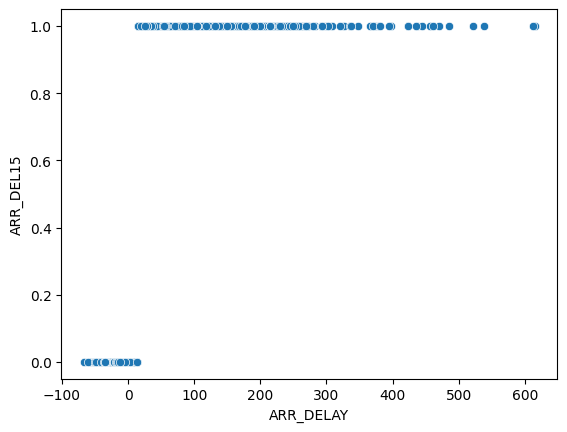

In [10]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=flight_data)

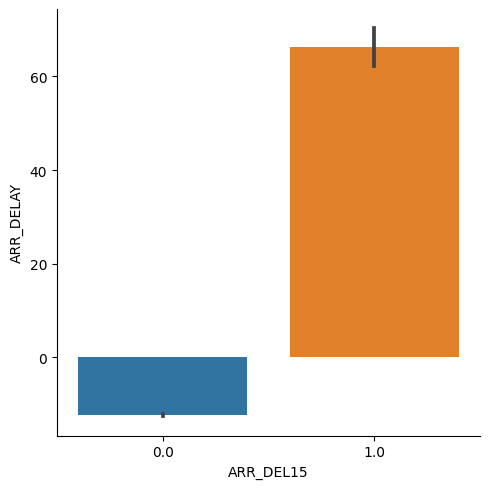

In [11]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=flight_data)

In [12]:
sns.heatmap(dataset.corr())

ValueError: could not convert string to float: 'DL'

In [ ]:
#filter the dataset to eliminate columns that aren't relevant to a predictive model.
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME","DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

In [ ]:
dataset[dataset.isnull().any(axis=1)].head(10)

In [ ]:
dataset['DEP_DEL15'].mode()

In [ ]:
#replace the missing values with 1s.
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]

In [ ]:
import math

for index, row in dataset.iterrows():
    dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
dataset.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [ ]:
dataset.head(5)

In [ ]:
dataset['ORIGIN'].unique()

In [ ]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

In [ ]:
x


In [ ]:
y

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()
#x=np.delete(x,[4,7],axis=1) 

In [ ]:
z

In [ ]:
t

In [ ]:
x=np.delete(x,[4,5],axis=1) 

In [ ]:
x.shape

In [ ]:
x=np.concatenate((t,z,x),axis = 1)

In [ ]:
x.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_test.shape

In [ ]:
x_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train,y_train)

In [ ]:
decisiontree = classifier.predict(x_test)

In [ ]:
decisiontree

In [ ]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)

In [ ]:
desacc

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,decisiontree)

In [ ]:
cm

In [ ]:
import sklearn.metrics as metrics
fpr1 ,tpr1 ,threshold1 =metrics.roc_curve(y_test,decisiontree)
roc_auc1 = metrics.auc(fpr1,tpr1)

In [ ]:
fpr1

In [ ]:
tpr1

In [ ]:
threshold1

In [ ]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [ ]:
import pickle
pickle.dump(classifier,open('flight.pkl','wb'))